In [17]:
from dp_gfn.utils import data
from transformers import AutoTokenizer
from torch.utils.data import DataLoader
import networkx as nx
import matplotlib.pyplot as plt
import conllu

In [18]:
dataset = data.BaseDataset("/media/doublemint/SharedDisk/repo/GFlowNets-DP/dp_gfn/data/ud-treebanks-v2.14/UD_English-Atis/en_atis-ud-train.conllu", store_nx_graph=True, return_edges=True)

In [19]:
G = dataset[0]['graph']
labels={node: label for node, label in enumerate(['root'] + dataset[0]['text'].split())}
edge_labels={(source, target): dataset.id_rel[tag_id] for source, target, tag_id in dataset[0]['edges']}

In [20]:
dataset[3]['num_words'], dataset[3]['text']

(8, 'what is the meaning of meal code s')

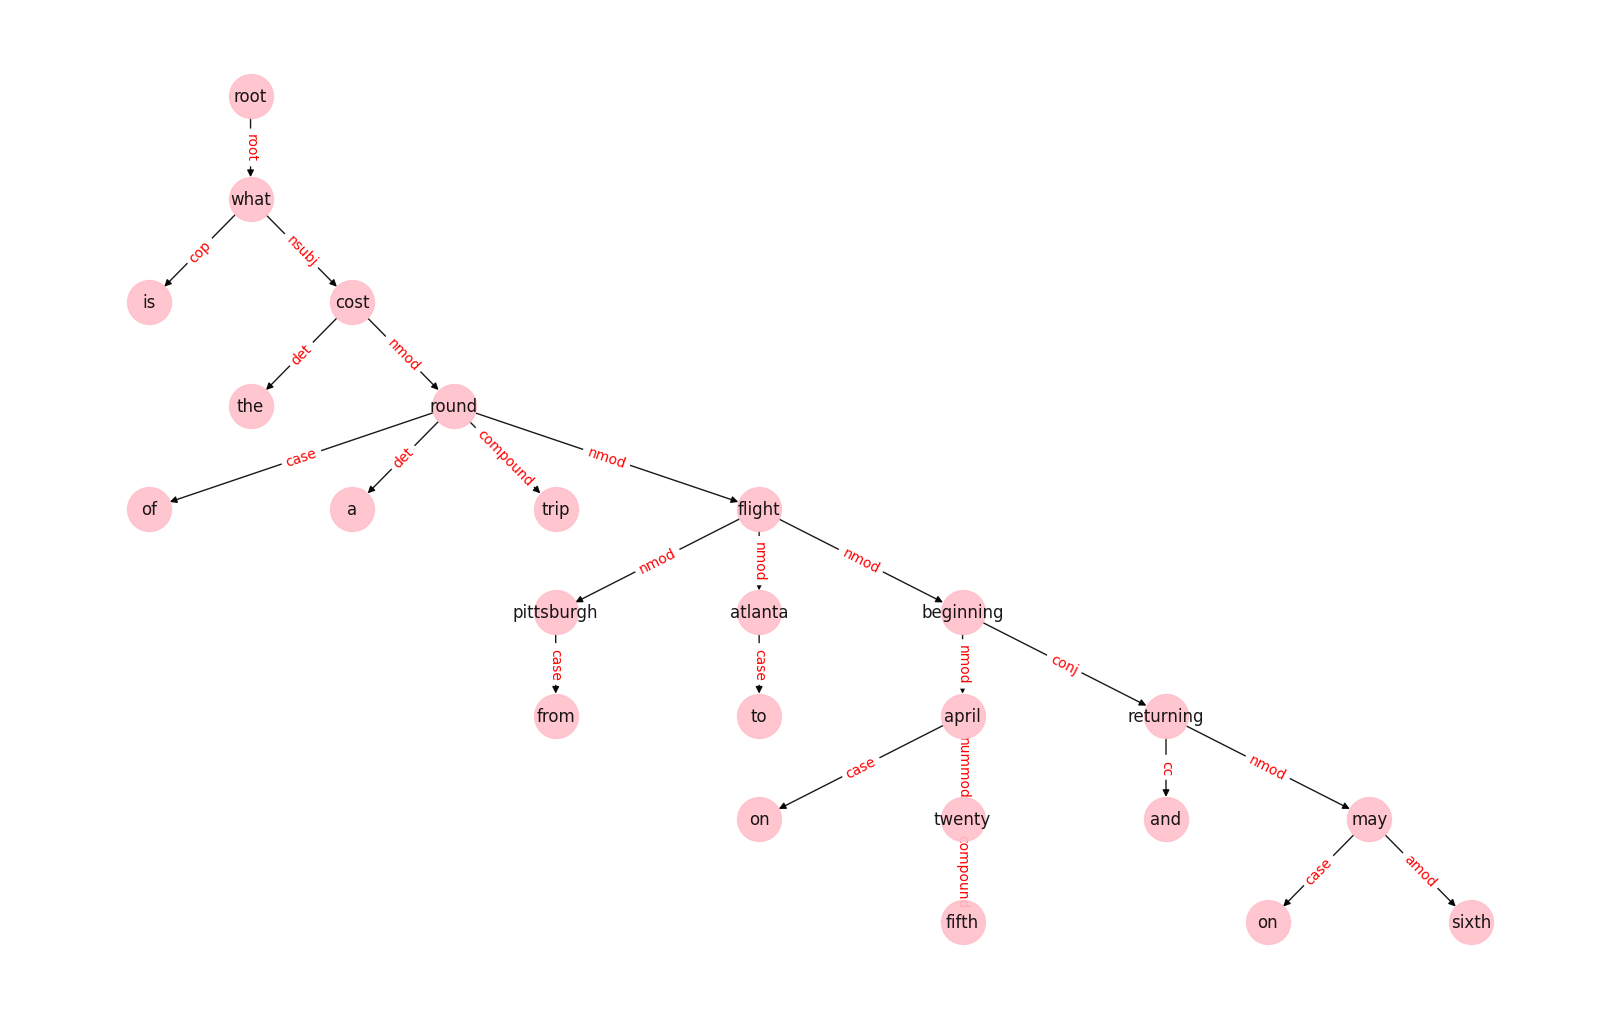

In [21]:
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
plt.figure(figsize=(16, 10))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=1000, node_color='pink', alpha=0.9,
    labels=labels
)
# nx.draw_networkx_labels(G, pos, labels={i: label for i, label in enumerate(dataset[0]['text'].split())})
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()

In [22]:
dataset = data.BaseDataset("/media/doublemint/SharedDisk/repo/GFlowNets-DP/dp_gfn/data/ud-treebanks-v2.14/UD_English-Atis/en_atis-ud-train.conllu")
train_loader = DataLoader(dataset, batch_size=16)

In [23]:
for bs in train_loader:
    break

In [24]:
bs['text'].__sizeof__()

168

In [25]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
tokens = tokenizer(bs['text'], return_tensors='pt', add_special_tokens=False, padding='max_length')

/home/doublemint/anaconda3/envs/dp_gfn/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [26]:
tokens.__sizeof__()

32

In [27]:
tokens['input_ids'].shape

torch.Size([16, 512])